In [4]:
import os
import cv2
import pandas as pd
import numpy as np
import joblib 
import os
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, WeightedRandomSampler
from PIL import Image
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

def analyze_images(root_dir):
    """Analyzes images in subdirectories and returns a DataFrame."""

    data = []
    for split in ['train', 'test']:
        split_dir = os.path.join(root_dir, split)
        for emotion in os.listdir(split_dir):
            emotion_dir = os.path.join(split_dir, emotion)
            for image_file in os.listdir(emotion_dir):
                if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check if it's an image
                    image_path = os.path.join(emotion_dir, image_file)
                    try:
                        img = cv2.imread(image_path)
                        if img is None:
                            print(f"Warning: Could not read image {image_path}")
                            continue  # Skip to the next image if reading fails
                        height, width, channels = img.shape
                        size = (width, height)
                        aspect_ratio = width / height
                        is_grayscale = (channels == 1)
                        mean_pixel_value = np.mean(img) #Mean pixel value
                        std_pixel_value = np.std(img) #Standard deviation of pixel values
                        min_pixel_value = np.min(img)
                        max_pixel_value = np.max(img)
                        data.append({
                            'split': split,
                            'emotion': emotion,
                            'file_name': image_file,
                            'size': size,
                            'aspect_ratio': aspect_ratio,
                            'channels': channels,
                            'is_grayscale': is_grayscale,
                            'mean_pixel_value': mean_pixel_value,
                            'std_pixel_value': std_pixel_value,
                            'min_pixel_value': min_pixel_value,
                            'max_pixel_value': max_pixel_value,
                        })
                    except Exception as e:
                        print(f"Error processing {image_path}: {e}")

    return pd.DataFrame(data)

# Example usage (replace with your root directory)
root_directory = './dataset_emociones'  # Assuming the script is in the same directory as 'train' and 'test'
df = analyze_images(root_directory)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15339 entries, 0 to 15338
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   split             15339 non-null  object 
 1   emotion           15339 non-null  object 
 2   file_name         15339 non-null  object 
 3   size              15339 non-null  object 
 4   aspect_ratio      15339 non-null  float64
 5   channels          15339 non-null  int64  
 6   is_grayscale      15339 non-null  bool   
 7   mean_pixel_value  15339 non-null  float64
 8   std_pixel_value   15339 non-null  float64
 9   min_pixel_value   15339 non-null  uint8  
 10  max_pixel_value   15339 non-null  uint8  
dtypes: bool(1), float64(3), int64(1), object(4), uint8(2)
memory usage: 1003.8+ KB


In [9]:
df.describe()

,aspect_ratio,channels,mean_pixel_value,std_pixel_value,min_pixel_value,max_pixel_value
count,15339.0,15339.0,15339.000000,15339.000000,15339.000000,15339.000000
mean,1.0,3.0,121.213288,55.114700,2.365734,243.348328
std,0.0,0.0,34.293184,13.668618,8.139129,23.073971
min,1.0,3.0,11.897433,6.621224,0.000000,40.000000
25%,1.0,3.0,97.069767,45.554805,0.000000,242.000000
50%,1.0,3.0,121.150100,54.455721,0.000000,255.000000
75%,1.0,3.0,145.483067,64.035642,0.000000,255.000000
max,1.0,3.0,236.206300,113.259548,169.000000,255.000000


In [10]:
df.head()

,split,emotion,file_name,size,aspect_ratio,channels,is_grayscale,mean_pixel_value,std_pixel_value,min_pixel_value,max_pixel_value
0,train,alegria,train_00003_aligned.jpg,"(100, 100)",1.0,3,False,152.753333,83.768101,0,255
1,train,alegria,train_00004_aligned.jpg,"(100, 100)",1.0,3,False,173.105500,76.814304,0,255
2,train,alegria,train_00008_aligned.jpg,"(100, 100)",1.0,3,False,121.993400,60.041547,3,255
3,train,alegria,train_00009_aligned.jpg,"(100, 100)",1.0,3,False,98.030200,45.078688,0,247
4,train,alegria,train_00011_aligned.jpg,"(100, 100)",1.0,3,False,73.018367,48.698960,0,255


In [14]:
print(df['size'].unique())
print(df['channels'].unique())
print(df['aspect_ratio'].unique())

[(100, 100)]
[3]
[1.]


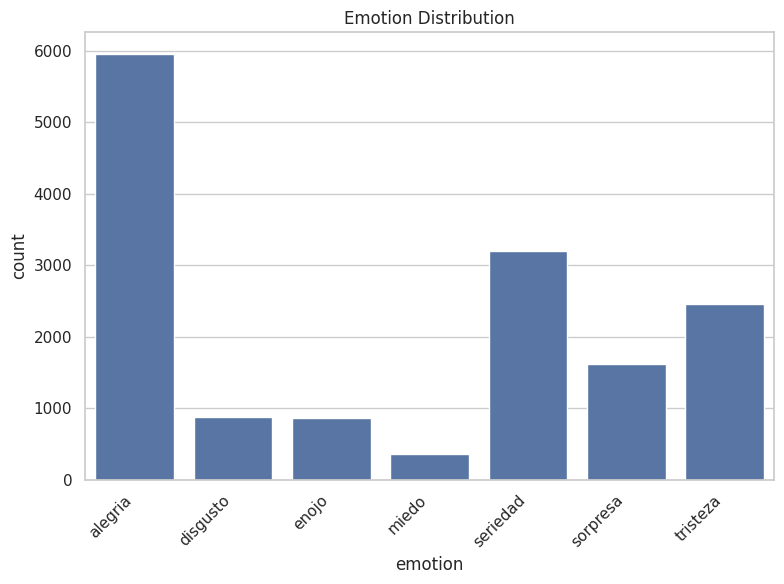

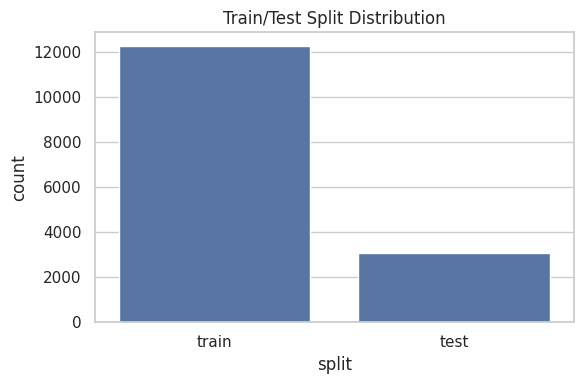

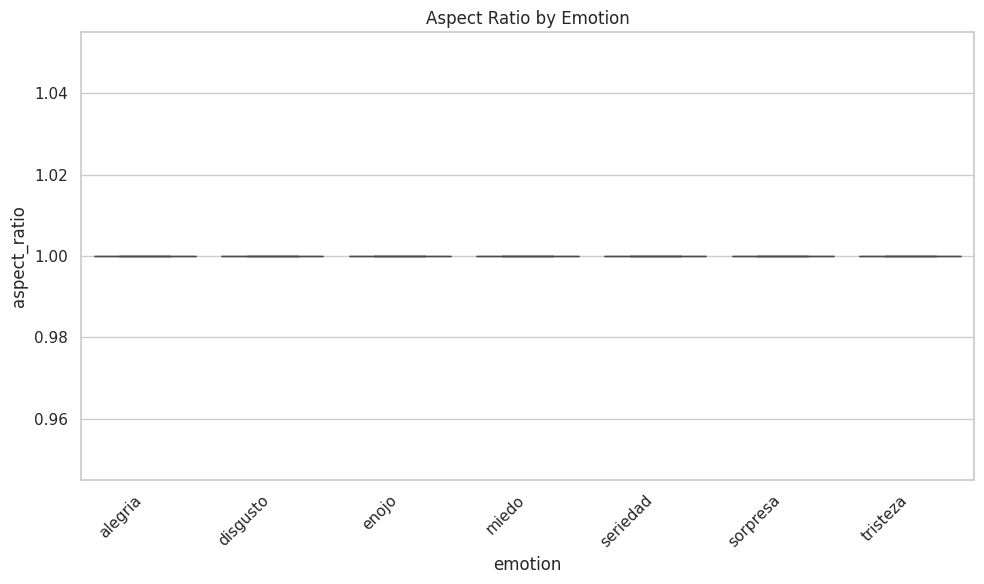

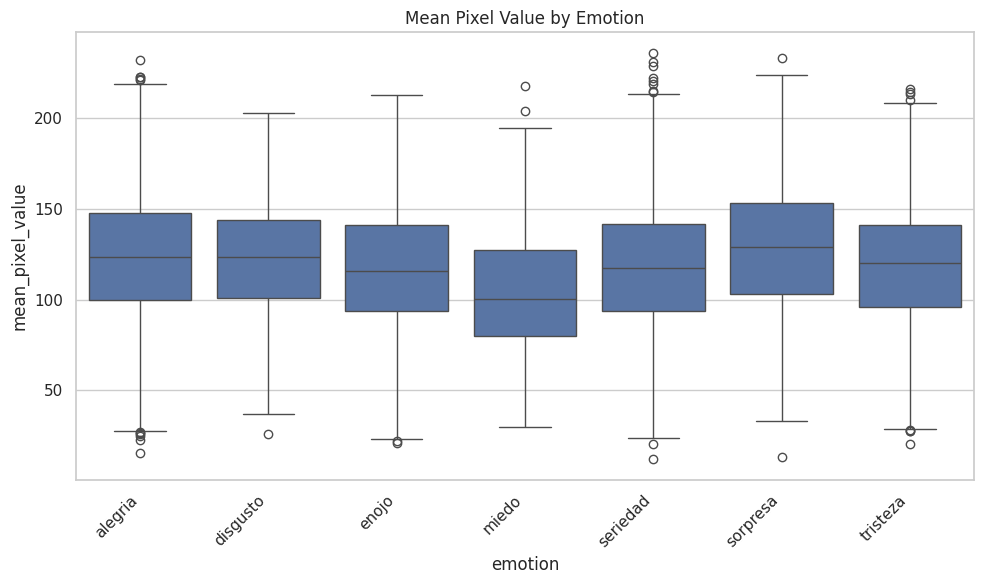

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_data_analysis(df):
    """Plots data analysis using Seaborn."""

    sns.set(style="whitegrid")  # Set Seaborn style

    plt.figure(figsize=(8, 6))
    sns.countplot(x='emotion', data=df)
    plt.title('Emotion Distribution')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.countplot(x='split', data=df)
    plt.title('Train/Test Split Distribution')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='emotion', y='aspect_ratio', data=df)
    plt.title('Aspect Ratio by Emotion')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='emotion', y='mean_pixel_value', data=df)
    plt.title('Mean Pixel Value by Emotion')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


    plt.show()

# Assuming 'df' is your DataFrame from the previous code
plot_data_analysis(df)

In [5]:
class NnClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, nnet_builder, epochs=100, lr=0.1):
        super(NnClassifier, self).__init__()
        self.device=device
        self.epochs = epochs
        self.lr = lr
        self.nnet_builder = nnet_builder

    def feed_model(self, X):
        return self.model(X)
        
    def fit(self, X, y):
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.long).to(self.device)
        
        self.nnet = self.nnet_builder.build()
        
        self.model = self.nnet.to(self.device)
        
        optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        criterion = nn.CrossEntropyLoss()

        self.model.train()
        for epoch in range(self.epochs):
            optimizer.zero_grad()
            output = self.feed_model(X_tensor)
            loss = criterion(output, y_tensor)
            loss.backward()
            optimizer.step()
        
        self.is_fitted_ = True
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            outputs = self.feed_model(X_tensor)
            predictions = torch.argmax(outputs, dim=1)
        # del X_tensor
        return predictions.cpu().numpy()

    def predict_proba(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            outputs = self.feed_model(X_tensor)
            probabilities = torch.softmax(outputs, dim=1)  # Convert logits to probabilities
        return probabilities.cpu().numpy()

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class ImageDataset(Dataset):
    def __init__(self, root_dir, transform=None, split='train'):
        self.image_paths = []
        self.labels = []
        self.transform = transform
        self.emotion_to_label = {emotion: i for i, emotion in enumerate(os.listdir(os.path.join(root_dir, 'train')))}

        split_dir = os.path.join(root_dir, split)
        for emotion in os.listdir(split_dir):
            emotion_dir = os.path.join(split_dir, emotion)
            for image_file in os.listdir(emotion_dir):
                if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    self.image_paths.append(os.path.join(emotion_dir, image_file))
                    self.labels.append(self.emotion_to_label[emotion])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

class EmotionCNNBuilder(nn.Module, BaseEstimator):
    def __init__(self, num_classes):
        super(EmotionCNNBuilder, self).__init__()
        self.num_classes = num_classes

    def build(self):
        new_instance = EmotionCNNBuilder(self.num_classes)
        new_instance.build_layers()
        return new_instance

    def build_layers(self):
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(256 * 7 * 7, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(512, self.num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
        
class NnClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, nnet_builder, epochs=10, lr=0.001, batch_size=32, rebalance=True):
        super(NnClassifier, self).__init__()
        self.device = device
        self.epochs = epochs
        self.lr = lr
        self.nnet_builder = nnet_builder
        self.batch_size = batch_size
        self.rebalance = rebalance

    def feed_model(self, X):
        return self.model(X)

    def fit(self, X, y=None): #y is unused for dataloader.
        dataloader = self.create_dataloader(X) #X is the dataset here.

        self.nnet = self.nnet_builder.build()
        self.model = self.nnet.to(self.device)

        optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        criterion = nn.CrossEntropyLoss()

        self.model.train()
        for epoch in range(self.epochs):
            running_loss = 0.0
            for images, labels in dataloader:
                images, labels = images.to(self.device), labels.to(self.device)
                optimizer.zero_grad()
                output = self.feed_model(images)
                loss = criterion(output, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            print(f"Epoch {epoch+1}, Loss: {running_loss / len(dataloader)}")

        self.is_fitted_ = True
        return self

    def predict(self, X):
        dataloader = DataLoader(X, batch_size=self.batch_size, shuffle=False)
        self.model.eval()
        all_preds = []
        with torch.no_grad():
            for images, _ in dataloader:
                images = images.to(self.device)
                outputs = self.feed_model(images)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
        return np.array(all_preds)

    def predict_proba(self, X):
        dataloader = DataLoader(X, batch_size=self.batch_size, shuffle=False)
        self.model.eval()
        all_probs = []
        with torch.no_grad():
            for images, _ in dataloader:
                images = images.to(self.device)
                outputs = self.feed_model(images)
                probabilities = torch.softmax(outputs, dim=1)
                all_probs.extend(probabilities.cpu().numpy())
        return np.array(all_probs)

    def create_dataloader(self, dataset):
        labels = dataset.labels # corrected line.
        if self.rebalance:
            class_counts = np.bincount(labels)
            class_weights = 1. / torch.tensor(class_counts, dtype=torch.float)
            sample_weights = [class_weights[label] for label in labels]
            sampler = WeightedRandomSampler(sample_weights, len(sample_weights))
            dataloader = DataLoader(dataset, batch_size=self.batch_size, sampler=sampler)
        else:
            dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)
        return dataloader


In [8]:
class RandomDataset(Dataset):
    def __init__(self, num_samples, input_shape, num_classes):
        self.num_samples = num_samples
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.labels = [torch.randint(0, num_classes, (1,)).item() for _ in range(num_samples)]

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        image = torch.randn(self.input_shape)
        label = self.labels[idx]
        return image, label


def smoke_test(input_shape=(3, 224, 224), num_classes=7, num_samples=10, batch_size=2):
    """Performs a smoke test using random data."""

    random_dataset = RandomDataset(num_samples, input_shape, num_classes)
    model_builder = EmotionCNNBuilder(num_classes)
    model = NnClassifier(model_builder, batch_size=batch_size, rebalance=False)

    try:
        print("Training.")
        model.fit(random_dataset)
        print("Fit test passed.")
    except Exception as e:
        print(f"Fit test failed: {e}")
        return False

    try:
        predictions = model.predict(random_dataset)
        print("Prediction test passed.")
        print(f"Predictions shape: {predictions.shape}")
    except Exception as e:
        print(f"Prediction test failed: {e}")
        return False

    try:
        probabilities = model.predict_proba(random_dataset)
        print("Probability test passed.")
        print(f"Probabilities shape: {probabilities.shape}")
    except Exception as e:
        print(f"Probability test failed: {e}")
        return False

    return True

smoke_test()

Training.
Created dataloader
Epoch 0.
Epoch 1, Loss: 3.3734183311462402
Epoch 1.
Epoch 2, Loss: 1.9308855772018432
Epoch 2.
Epoch 3, Loss: 1.9231324911117553
Epoch 3.
Epoch 4, Loss: 1.8814547777175903
Epoch 4.
Epoch 5, Loss: 1.7971750259399415
Epoch 5.
Epoch 6, Loss: 1.7556676149368287
Epoch 6.
Epoch 7, Loss: 1.8136650800704956
Epoch 7.
Epoch 8, Loss: 1.7646104097366333
Epoch 8.
Epoch 9, Loss: 1.7361786127090455
Epoch 9.
Epoch 10, Loss: 1.8067750692367555
Fit test passed.
Prediction test passed.
Predictions shape: (10,)
Probability test passed.
Probabilities shape: (10, 7)


True

Epoch 1, Loss: 1.7846071698392432
Epoch 2, Loss: 1.3481838158331811
Epoch 3, Loss: 1.0668674963526428
Epoch 4, Loss: 0.8726779233353833
Epoch 5, Loss: 0.7181159233053526
Epoch 6, Loss: 0.6107174612504119
Epoch 7, Loss: 0.5166741547485193
Epoch 8, Loss: 0.4415518283494748
Epoch 9, Loss: 0.37953223375370726
Epoch 10, Loss: 0.3576841834001243
              precision    recall  f1-score   support

     alegria       0.97      0.88      0.92      4772
    disgusto       0.74      0.99      0.85       717
       enojo       0.91      0.99      0.95       705
       miedo       0.92      1.00      0.96       281
    seriedad       0.84      0.85      0.85      2524
    sorpresa       0.91      0.97      0.94      1290
    tristeza       0.85      0.86      0.85      1982

    accuracy                           0.89     12271
   macro avg       0.88      0.93      0.90     12271
weighted avg       0.90      0.89      0.89     12271



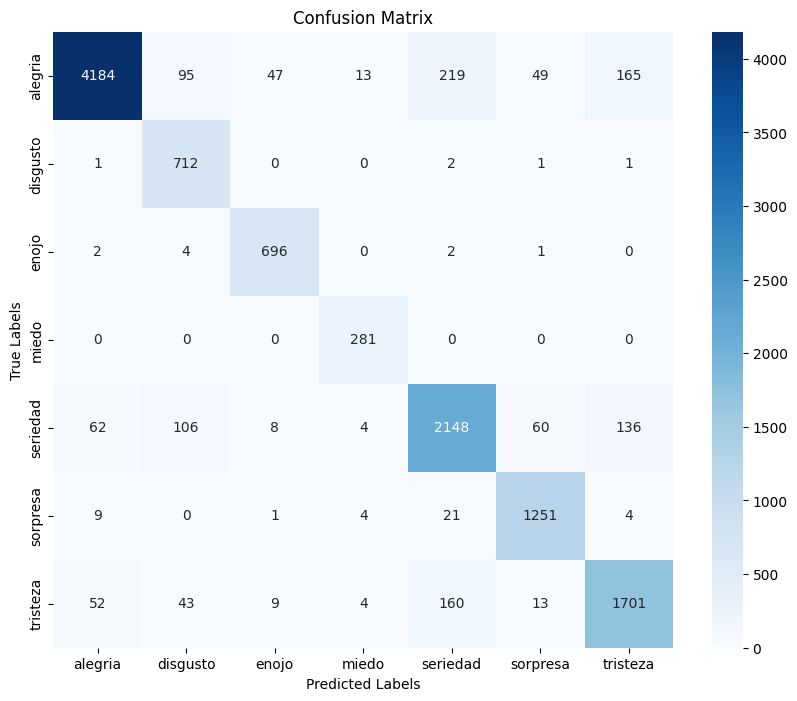

In [11]:
# Example usage
root_directory = './dataset_emociones'
transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageDataset(root_directory, transform, split='train')
test_dataset = ImageDataset(root_directory, transform, split='train') #for test, change to test.

num_classes = len(os.listdir(os.path.join(root_directory, 'train')))
cnn_builder = EmotionCNNBuilder(num_classes)

classifier = NnClassifier(cnn_builder)
classifier.fit(train_dataset)

predictions = classifier.predict(test_dataset)

emotion_labels = os.listdir(os.path.join(root_directory, 'train'))
true_labels = test_dataset.labels
print(classification_report(true_labels, predictions, target_names=emotion_labels))

cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [30]:
torch.cuda.empty_cache()

In [18]:
class ConfigurableCNNBuilder(nn.Module, BaseEstimator):
    def __init__(self, architecture_string, num_classes):
        super(ConfigurableCNNBuilder, self).__init__()
        self.architecture_string = architecture_string
        self.num_classes = num_classes

    def build(self):
        new_instance = ConfigurableCNNBuilder(self.architecture_string, self.num_classes)
        new_instance.build_layers()
        return new_instance

    def build_layers(self):
        layers = []
        in_channels = 3
        pool_count = 0
        conv_output_shape = (3, 100, 100) #initial input shape.
        flatten_layer_added = False #track if flatten layer was added.
        dim=100
        for i, layer_type in enumerate(self.architecture_string):
            if layer_type == 'C':
                out_channels = 64 * (2 ** pool_count)
                layers.append((f'conv_{i}', nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)))
                layers.append((f'relu_{i}', nn.ReLU(inplace=True)))
                in_channels = out_channels
                dim = dim - 3 + 1
                conv_output_shape = (out_channels, conv_output_shape[1], conv_output_shape[2]) #update output shape
                print(f"shape {conv_output_shape}")
                print(f"dim {torch.prod(torch.tensor(conv_output_shape))}")
                print(f"dim2 {dim}")
            elif layer_type == 'P':
                layers.append((f'pool_{i}', nn.MaxPool2d(kernel_size=2, stride=2)))
                pool_count += 1
                conv_output_shape = (conv_output_shape[0], conv_output_shape[1] // 2, conv_output_shape[2] // 2) #update output shape
                dim = (dim / 2) + 1
                print(f"dim2 {dim}")
                print(f"shape {conv_output_shape}")
                print(f"dim {torch.prod(torch.tensor(conv_output_shape))}")
            elif layer_type == 'I':
                layers.append((f'inception_{i}', InceptionModule(in_channels, 64, 96, 128, 16, 32, 32)))
                in_channels = 256
                conv_output_shape = (in_channels, conv_output_shape[1], conv_output_shape[2]) #update output shape
            elif layer_type == 'N':
                layers.append((f'norm_{i}', nn.LayerNorm(conv_output_shape)))
            elif layer_type == 'F':
                print(f"shape {conv_output_shape}")
                print(f"dim {torch.prod(torch.tensor(conv_output_shape))}")
                if not flatten_layer_added: #flatten before first fully connected.
                    layers.append(('flatten', nn.Flatten()))
                    flatten_layer_added = True
                if i == self.architecture_string.rfind('F'): #Last F layer.
                    layers.append((f'fc_{i}', nn.Linear(torch.prod(torch.tensor(conv_output_shape)), self.num_classes)))
                else:
                    layers.append((f'fc_{i}', nn.Linear(torch.prod(torch.tensor(conv_output_shape)), 512)))
                    layers.append((f'relu_fc_{i}', nn.ReLU(inplace=True)))
                    layers.append((f'dropout_fc_{i}', nn.Dropout()))
                    conv_output_shape = (512,) #update output shape
                    
        self.net = nn.Sequential(OrderedDict(layers))

    def forward(self, x):
        return self.net(x)

shape (64, 100, 100)
dim 640000
dim2 98
dim2 50.0
shape (64, 50, 50)
dim 160000
shape (128, 50, 50)
dim 320000
dim2 48.0
dim2 25.0
shape (128, 25, 25)
dim 80000
shape (128, 25, 25)
dim 80000
shape (512,)
dim 512
Epoch 1, Loss: 1.6882927046778302
Epoch 2, Loss: 1.1874151087055604
Epoch 3, Loss: 1.0079306218152244
Epoch 4, Loss: 0.8787188279287269
Epoch 5, Loss: 0.7718562001052002
Epoch 6, Loss: 0.685539438466852
Epoch 7, Loss: 0.596870024378101
Epoch 8, Loss: 0.5505209421583762
Epoch 9, Loss: 0.4950827523910751
Epoch 10, Loss: 0.4622508357667054
              precision    recall  f1-score   support

     alegria       0.97      0.81      0.88      4772
    disgusto       0.75      0.97      0.84       717
       enojo       0.81      1.00      0.90       705
       miedo       0.96      1.00      0.98       281
    seriedad       0.76      0.84      0.80      2524
    sorpresa       0.84      0.96      0.90      1290
    tristeza       0.77      0.77      0.77      1982

    accuracy   

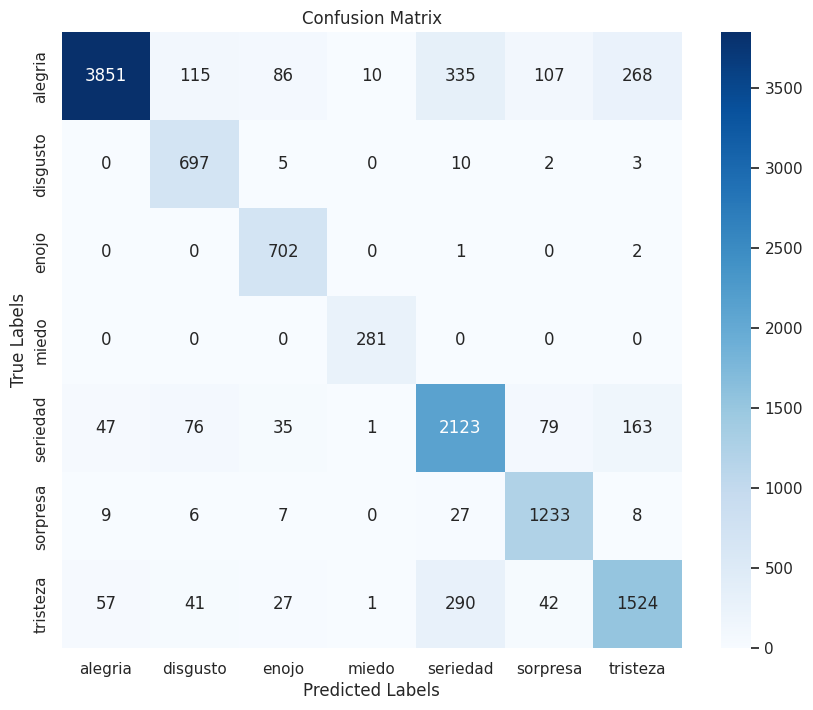

In [19]:
# Example usage
root_directory = './dataset_emociones'
transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageDataset(root_directory, transform, split='train')
test_dataset = ImageDataset(root_directory, transform, split='train') #for test, change to test.

num_classes = len(os.listdir(os.path.join(root_directory, 'train')))
cnn_builder = ConfigurableCNNBuilder("CPCPFF",num_classes)

classifier = NnClassifier(cnn_builder)
classifier.fit(train_dataset)

predictions = classifier.predict(test_dataset)

emotion_labels = os.listdir(os.path.join(root_directory, 'train'))
true_labels = test_dataset.labels
print(classification_report(true_labels, predictions, target_names=emotion_labels))

cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [11]:
102400/(25*25)

163.84

In [17]:
print(classifier.model)

ConfigurableCNNBuilder(
  (net): Sequential(
    (conv_0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu_0): ReLU(inplace=True)
    (pool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv_2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu_2): ReLU(inplace=True)
    (pool_3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (fc_4): Linear(in_features=80000, out_features=512, bias=True)
    (relu_fc_4): ReLU(inplace=True)
    (dropout_fc_4): Dropout(p=0.5, inplace=False)
    (fc_5): Linear(in_features=512, out_features=7, bias=True)
  )
)
